In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

In [2]:
teams_df = pd.read_csv('data/2025/womens_l2_ne_teams.csv')
teams_df

,Club ID,Club
0,175311,ALLIANCE UNITED L2 WOMEN
1,175340,NORTH TORONTO L2 WOMEN
2,175417,PICKERING FC L2 WOMEN
3,175361,SIMCOE COUNTY ROVERS FC L2 WOMEN
4,175370,WOODBRIDGE STRIKERS L2 WOMEN
5,183419,WHITBY FC L2 WOMEN
6,175388,MASTER'S FA WOMEN
7,175297,VAUGHAN AZZURRI L2 WOMEN
8,175352,SCROSOPPI FC L2 WOMEN
9,175394,NORTH MISSISSAUGA SC L2 WOMEN


In [3]:
scores_df = pd.read_csv('data/2025/2025-06-28_womens_l2_ne_results.csv')
scores_df


,Match ID,Home result,Away result,Home team,Away team
0,262606499,1,1,175361,175352
1,262606500,1,1,183419,175388
2,262606501,4,0,175297,175394
3,262606502,2,0,175311,175340
4,262606503,7,0,175370,175411
5,262606504,1,0,183425,175417
6,262606505,1,2,175411,175394
7,262606506,2,3,175297,175361
8,262606507,4,3,175311,183425
9,262606508,1,2,183419,175352


In [4]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [5]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           ALLIANCE UNITED L2 WOMEN  NORTH TORONTO L2 WOMEN  PICKERING FC L2 WOMEN  SIMCOE COUNTY ROVERS FC L2 WOMEN  WOODBRIDGE STRIKERS L2 WOMEN  WHITBY FC L2 WOMEN  MASTER'S FA WOMEN  VAUGHAN AZZURRI L2 WOMEN  SCROSOPPI FC L2 WOMEN  NORTH MISSISSAUGA SC L2 WOMEN  SUDBURY CYCLONES WOMEN  UNIONVILLE MILLIKEN SC L2 WOMEN
262606499                         0                       0                      0                                 1                             0                   0                  0                         0                     -1                              0                       0                                0
262606500                         0                       0                      0                                 0                             0                   1                 -1                         0                      0                              0                       0                                0
262606501                      

In [6]:
print(X_df.T.to_string())

                                  262606499  262606500  262606501  262606502  262606503  262606504  262606505  262606506  262606507  262606508  262606509  262606510  262606511  262606512  262606513  262606514  262606515  262606516  262606517  262606518  262606519  262606520  262606521  262606522  262606523  262606524  262606526  262606527  262606528  262606529  262606530  262606531  262606532  262606533  262606534  262606535  262606536  262606537  262606538  262606539  262606540  262606541  262606542  262606543  262606544  262606545  262606546  262606547  262606548  262606549  262606551  262606552  262606553  262606554  262606555  262606556  262606557
ALLIANCE UNITED L2 WOMEN                  0          0          0          1          0          0          0          0          1          0          0          0          0         -1          0          0          0          0          1          0          0          0          0          0          0          1          0          0

In [7]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                                  ALLIANCE UNITED L2 WOMEN  NORTH TORONTO L2 WOMEN  PICKERING FC L2 WOMEN  SIMCOE COUNTY ROVERS FC L2 WOMEN  WOODBRIDGE STRIKERS L2 WOMEN  WHITBY FC L2 WOMEN  MASTER'S FA WOMEN  VAUGHAN AZZURRI L2 WOMEN  SCROSOPPI FC L2 WOMEN  NORTH MISSISSAUGA SC L2 WOMEN  SUDBURY CYCLONES WOMEN  UNIONVILLE MILLIKEN SC L2 WOMEN
ALLIANCE UNITED L2 WOMEN                                10                      -1                     -1                                -1                            -1                  -1                  0                        -2                      0                             -1                      -1                               -1
NORTH TORONTO L2 WOMEN                                  -1                       9                     -1                                 0                             0                   0                 -1                        -1                     -1                             -1                    

In [8]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                                  ALLIANCE UNITED L2 WOMEN  NORTH TORONTO L2 WOMEN  PICKERING FC L2 WOMEN  SIMCOE COUNTY ROVERS FC L2 WOMEN  WOODBRIDGE STRIKERS L2 WOMEN  WHITBY FC L2 WOMEN  MASTER'S FA WOMEN  VAUGHAN AZZURRI L2 WOMEN  SCROSOPPI FC L2 WOMEN  NORTH MISSISSAUGA SC L2 WOMEN  SUDBURY CYCLONES WOMEN  UNIONVILLE MILLIKEN SC L2 WOMEN
ALLIANCE UNITED L2 WOMEN                                10                      -1                     -1                                -1                            -1                  -1                  0                        -2                      0                             -1                      -1                               -1
NORTH TORONTO L2 WOMEN                                  -1                       9                     -1                                 0                             0                   0                 -1                        -1                     -1                             -1                    

In [9]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
print(p_bar_df.to_string())

                                  GD
ALLIANCE UNITED L2 WOMEN          12
NORTH TORONTO L2 WOMEN            11
PICKERING FC L2 WOMEN              6
SIMCOE COUNTY ROVERS FC L2 WOMEN   9
WOODBRIDGE STRIKERS L2 WOMEN      24
WHITBY FC L2 WOMEN                 2
MASTER'S FA WOMEN                -30
VAUGHAN AZZURRI L2 WOMEN           5
SCROSOPPI FC L2 WOMEN             14
NORTH MISSISSAUGA SC L2 WOMEN    -15
SUDBURY CYCLONES WOMEN            -4
UNIONVILLE MILLIKEN SC L2 WOMEN    0


In [10]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
print(p_bar_bw_df.to_string())

                                  GD with limited blowouts
ALLIANCE UNITED L2 WOMEN                                12
NORTH TORONTO L2 WOMEN                                   6
PICKERING FC L2 WOMEN                                    4
SIMCOE COUNTY ROVERS FC L2 WOMEN                         6
WOODBRIDGE STRIKERS L2 WOMEN                            17
WHITBY FC L2 WOMEN                                       2
MASTER'S FA WOMEN                                      -19
VAUGHAN AZZURRI L2 WOMEN                                 2
SCROSOPPI FC L2 WOMEN                                    7
NORTH MISSISSAUGA SC L2 WOMEN                          -12
SUDBURY CYCLONES WOMEN                                  -3
UNIONVILLE MILLIKEN SC L2 WOMEN                          0


In [11]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                                  massey_rating
WOODBRIDGE STRIKERS L2 WOMEN           2.717941
ALLIANCE UNITED L2 WOMEN               1.279204
SCROSOPPI FC L2 WOMEN                  1.036489
PICKERING FC L2 WOMEN                  0.674456
SIMCOE COUNTY ROVERS FC L2 WOMEN       0.661928
NORTH TORONTO L2 WOMEN                 0.441810
WHITBY FC L2 WOMEN                     0.375788
VAUGHAN AZZURRI L2 WOMEN               0.262437
SUDBURY CYCLONES WOMEN                -0.250763
NORTH MISSISSAUGA SC L2 WOMEN         -1.527750
UNIONVILLE MILLIKEN SC L2 WOMEN       -2.826244
MASTER'S FA WOMEN                     -2.845296


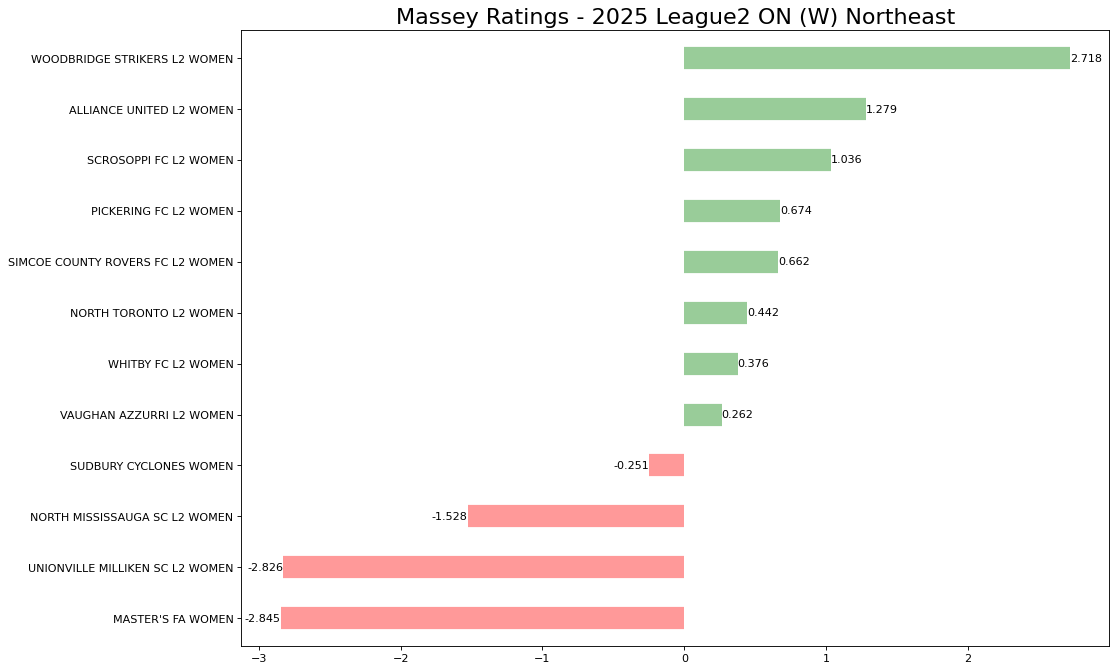

In [12]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (W) Northeast', fontdict={
          'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [13]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                                  massey_rating
WOODBRIDGE STRIKERS L2 WOMEN           2.018450
ALLIANCE UNITED L2 WOMEN               1.231085
PICKERING FC L2 WOMEN                  0.508567
SIMCOE COUNTY ROVERS FC L2 WOMEN       0.437847
SCROSOPPI FC L2 WOMEN                  0.360211
WHITBY FC L2 WOMEN                     0.321818
NORTH TORONTO L2 WOMEN                 0.137221
VAUGHAN AZZURRI L2 WOMEN               0.064006
SUDBURY CYCLONES WOMEN                -0.172464
NORTH MISSISSAUGA SC L2 WOMEN         -1.218922
MASTER'S FA WOMEN                     -1.838141
UNIONVILLE MILLIKEN SC L2 WOMEN       -1.849678


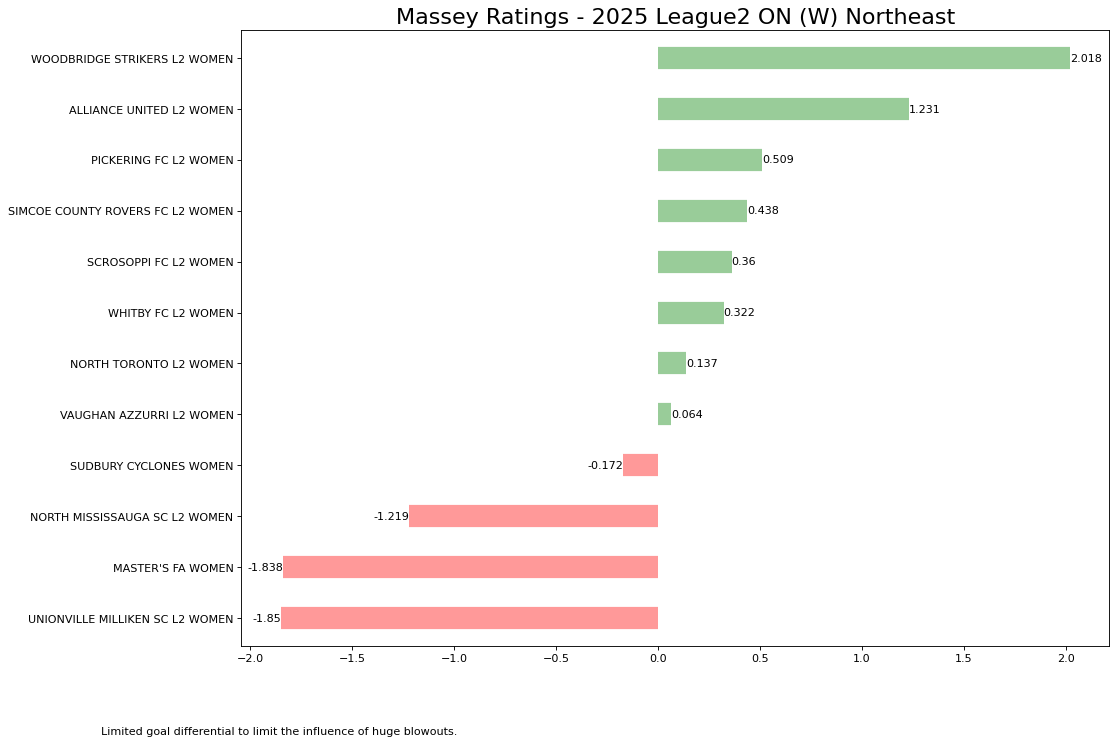

In [14]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (W) Northeast', fontdict={'size': 20})
plt.figtext(s='Limited goal differential to limit the influence of huge blowouts.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()